In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
df = pd.read_csv('digit recognizer\\train.csv')

In [4]:
X_train = df.drop('label', axis = 1)

In [5]:
Y_train = df['label']

In [6]:
X_train = X_train[:2000]
Y_train = Y_train[:2000]

# задаем переменные для обучения модели

In [7]:
X_train = X_train.values
Y_train = Y_train.values
X_train = X_train.T

# переводим их в матричный вид

In [8]:
# перевод y в one encoding
n_Y_train = 10
Y_train = np.eye(n_Y_train)[Y_train]

In [9]:
Y_train = Y_train.T

In [10]:
Y_train.shape

(10, 2000)

In [11]:
X_train.shape

(784, 2000)

In [12]:
def relu(x): # функция активации релу
    return np.maximum(x, 0)

In [13]:
# def tanh(x):
#     return np.tanh(x)

# можно использовать также tanh

In [14]:
def softmax(x): # софтмакс для расчета вероятностей
    out = np.exp(x)
    return out / np.sum(out, axis = 0)

In [15]:
def dev_relu(x): # производная релу
    return np.array(x > 0, dtype = np.float32)

In [16]:
# def derivative_tanh(x):
#     return (1 - np.power(np.tanh(x), 2))

In [17]:
def initialize(n_x, n_h, n_y): # создаем рандомные матрицы w и b, чтобы от них отталкиваться в сторону антиградиента

    W1 = np.random.randn(n_h, n_x) * 0.0001 # умножаем на маленькое число в целях избежания хаоса на первых итерациях поиска минимума
    b1 = np.zeros((n_h, 1))

    W2 = np.random.randn(n_y, n_h) * 0.0001
    b2 = np.zeros((n_y, 1))
    
    parameters = {'W1': W1,
                 'b1': b1,
                 'W2': W2,
                 'b2': b2}
    return parameters

Forward prop

In [18]:
def forward(x, parameters): 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    z1 = np.dot(W1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(W2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {'z1': z1,
                    'a1': a1,
                    'z2': z2,
                    'a2': a2,
                    }
    return forward_cache

# это функция прямого распространения ошибки. В нашей нейронке будет 2 слоя
# на первом слое имеем матричное умножение весов W1 на входные значения (яркость пикселей) + смещение, а потом применяем релу
# на втором слое матрицу W2 умножаем на полученные значения и прибавляем b2
# полседнее- пропускаем через softmax

Cost

In [19]:
def error(a2, y): # функция ошибки
    m = y.shape[1]
    
    cost = (-1/m) * np.sum(y * np.log(a2))
    return cost                      

Backward

In [53]:
def backward(x, y, parameters, forward_cache): # обратное распространение
     
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y) # считаем производные
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis = 1, keepdims=True)
    
    
    dz1 = (1/m)*np.dot(W2.T, dz2)*dev_relu(a1) # вот тут интересный момент. правильнee dev_relu(a1), а не dev_relu(z1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {'dw1': dw1,
                'db1': db1,
                'dw2': dw2,
                'db2': db2} # запекаем все в словарь
    return gradients

Update

In [21]:
def update(parameters, gradients, lr): # шагаем в сторону антиградиента
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    
    W1 = W1 - lr * dw1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dw2
    b2 = b2 - lr * db2
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parameters

In [22]:
def model(x, y, n_h, lr, iterations): # функция, которая вызывает все функции
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_l = []
    
    parameters = initialize(n_x, n_h, n_y)
    
    for i in range(iterations):
        forward_cache = forward(x, parameters)
        
        cost = error(forward_cache['a2'], y)
        
        gradients = backward(x, y, parameters, forward_cache)
        
        parameters = update(parameters, gradients, lr)
        
        cost_l.append(cost)
        
        if (i%(iterations/10)) == 0:
            print(cost)
    return parameters, cost_l

In [54]:
iterations = 200
n_h = 2000
lr = 0.05 # вбили количесвто итераций, количество нейронок скрытого слоя, длину шага. И вызвали функцию модель
Parameters, Cost_list = model(X_train, Y_train, n_h=n_h, lr = lr, iterations=iterations)

2.3025402122546956
1.0824763342978028
0.5630141821262653
0.41917360023993033
0.3468548558526878
0.30035791546999635
0.26605595685640165
0.23868930107376946
0.21576998181765283
0.1959989930304048


как видим, функция потерь успешно стремится вниз

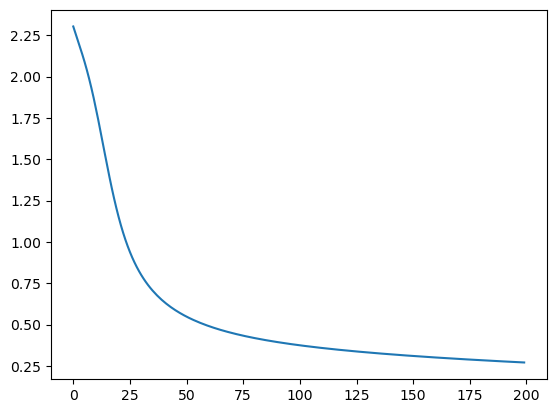

In [25]:
axis = np.arange(0, iterations)
plt.plot(axis, Cost_list); 

In [24]:
X_test = df.drop('label', axis = 1)
Y_test = df['label'] # тестовые данные для проверки модели

In [25]:
X_test = X_test[4000:10000]
Y_test = Y_test[4000:10000]

In [26]:
X_test = X_test.values
Y_test = Y_test.values
X_test = X_test.T

In [27]:
n_Y_test = 10
Y_test = np.eye(n_Y_test)[Y_test]

In [28]:
Y_test = Y_test.T

In [29]:
def accuracy(inp, labels, parameters):
    forward_cache = forward(inp, parameters)
    a_out = forward_cache['a2']  
    
    a_out = np.argmax(a_out, 0) 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [56]:
print('Точность предсказаний', accuracy(X_train, Y_train, Parameters),'%')

Точность предсказаний 95.89999999999999 %


In [55]:
print('Точность предсказаний', accuracy(X_test, Y_test, Parameters),'%')

# как видим, результат получился солидным

Точность предсказаний 89.56666666666668 %


In [34]:
import cv2

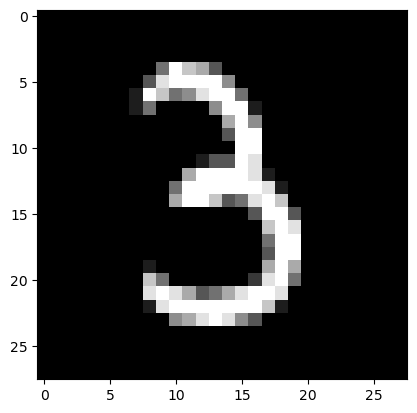

Нейронка Гайка считает, что это : 3


In [52]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap = 'gray')
plt.show()

cache = forward(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Нейронка Гайка считает, что это :", a_pred[0])